Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Guilherme de Abreu Lima Buitrago Miranda"
COLLABORATORS = ""

---

# Exercício Prático 2: SVD truncado

Neste exercício vamos estudar as aproximações obtidas pelo SVD truncado. Vamos começar carregando os dados do 20_newsgroups, conforme visto em sala.

In [2]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
np.set_printoptions(suppress=True)

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)

vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(2034, 26576)

In [4]:
%time U, s, Vt = linalg.svd(vectors, full_matrices=False)

CPU times: user 5min 57s, sys: 569 ms, total: 5min 57s
Wall time: 5min 57s


## Questão 1

Plote uma curva contendo os valores singulares $s$.

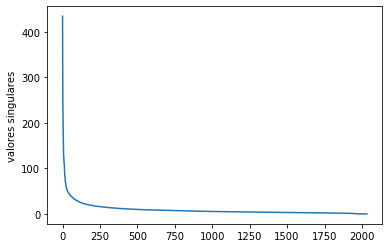

In [5]:
# solucao da Questao 1

# YOUR CODE HERE
plt.ylabel('valores singulares')
plt.plot(s)

## Questão 2

Repita o gráfico da questão anterior, mas desta vez, tente dar um "zoom" para mostrar onde está o joelho da curva, ou seja, o ponto a partir do qual os valores passam a ser muito baixos. Para isto, você pode pegar um slice de ```s```, ou usar a função ```plt.xlims```.

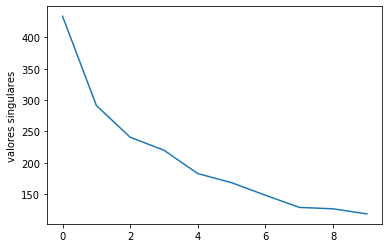

In [6]:
# solucao da Questao 2

# YOUR CODE HERE
plt.ylabel('valores singulares')
plt.plot(s[:10])

## Questão 3

Seja $A$ uma matriz $m \times n$. O SVD reduzido de $A$ retorna $U_{m \times k}$, $\Sigma_{k \times k}$ e $V^\top_{k \times n}$, onde $k = \min(m,n)$. Já o SVD truncado de posto $r < \min(m,n)$ retorna apenas as $r$ primeiras colunas de $U$, os $r$ maiores valores singulares de $\Sigma$ e as $r$ primeiras linhas de $V^\top$.

Uma propriedade importante do SVD truncado é que ele retorna a melhor aproximação $A_r$ para uma matriz $A$ dentre todas as matrizes de posto $r$, onde a qualidade da aproximação é medida por $\| A - A_r \|_F$, sendo $\| B \|_F = \sqrt{\sum_i \sum_j B_{i,j}^2}$ a norma de Frobenius de uma matriz $B$.

Nesta questão, vamos ver como a qualidade da aproximação aumenta com $r$, variando $r$ em $\{1,2,4,\ldots,2^7\}$. Primeiramente, vamos encontrar a decomposição SVD reduzida para a matriz ```vectors```. Depois disso, vamos variar o número $r$ de valores singulares considerados para encontrar aproximações $A_r$ para, finalmente, calcular $\| A - A_r \|_F$. Para facilitar a resolução deste problema, parte do código já foi fornecida. Para calcular a norma Frobenius, consulte a documentação de ```np.linalg.norm```.

Text(0.5, 0, 'r')

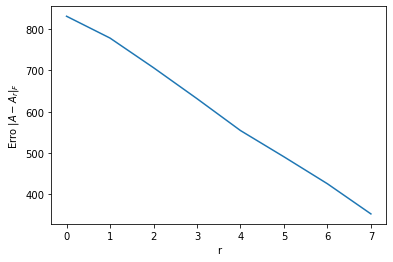

In [7]:
m,n = vectors.shape
k = min(m,n)

A_r = np.zeros((m,n))
erro = np.zeros(8)
r_values = 2**np.arange(8)
vectors=np.dot(np.dot(U, np.diag(s)), Vt)

for i in range(len(r_values)):
    r = r_values[i]
    A = np.dot(np.dot(U[:, :r], np.diag(s[:r])), Vt[:r, :])
    erro[i] = (np.linalg.norm(vectors - A))
    # YOUR CODE HERE
    

# código para plotar o vetor erro
# YOUR CODE HERE

plt.plot(erro)
plt.ylabel(r'Erro $\|A-A_r\|_F$')
plt.xlabel('r')

## Questão 4

Vamos criar e implementar uma heurística para a escolha de $k$. Deseja-se obter uma representação de baixa dimensão $k$ para a matriz ```vectors```. Implemente uma função que recebe um vetor de valores singulares em ordem descrente e retorna o número de valores singulares que é maior ou igual a 2x a média. (Dica: você pode usar ```np.mean```).

In [8]:
# solucao da Questao 4

def escolheK(s):
    """ Retorna o inteiro k contendo o número de valores singulares que é pelo menos 2x maior que a média.
    
        Entrada:
            s é um vetor contendo os valores singulares em ordem decrescente
    """
    k = 0
    condition = s >= 2*(np.mean(s))
    k = np.extract(condition, s).size
    # YOUR CODE HERE
    return k

In [9]:
s_example = np.hstack((np.arange(1000,100,-100),np.arange(100,10,-10),np.arange(10,1,-1)))
print(s_example)

assert escolheK(s_example) == 6
assert escolheK(s) == 191

[1000  900  800  700  600  500  400  300  200  100   90   80   70   60
   50   40   30   20   10    9    8    7    6    5    4    3    2]
